## 1.c - Mathematical operations with images


In the last section we saw how images can be interpreted as functions and how we can perform few fundamental operations on images In this section we will deal with more mathematical operations with images. So, let's begin!

In [1]:
# Import Open-CV
import cv2
# Import numpy
import numpy as np
#Import matplotlib
from matplotlib import pyplot as plt

Now, let's load and display two images

In [67]:
image1 = cv2.imread('dataset/bicycle.png')
image2 = cv2.imread('dataset/dolphin.png')

In [3]:
# Utility function to display images
def show_image(img):
    print(img.shape)
    img = img.astype('uint8')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

(320, 500, 3)


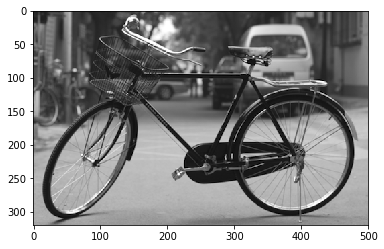

(320, 500, 3)


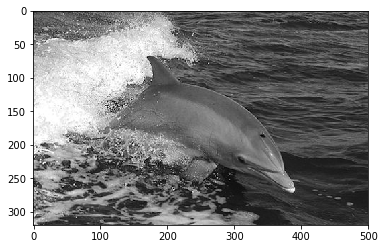

In [4]:
show_image(image1)
show_image(image2)

We see that both these images have equal dimensions, so now let's try out some basic arithmetic operations.

### Addition

(320, 500, 3)


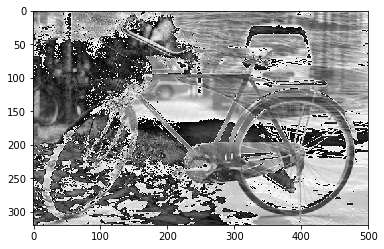

In [5]:
added_image = image1 + image2
show_image(added_image)

Eww, this looks like an ugly image! Why do you think it happened? But did you notice that the added image still has the same dimensions? Now, let's another experiment.

(320, 500, 3)


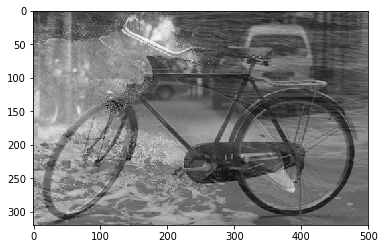

In [6]:
added_image = image1//2 + image2//2
show_image(added_image)

Now, this one looks more soothing to the eye! For this case we have reduced the individual values to half and then added. In the previous case, the noisy image came mostly because of unsigned int addition, as we had discussed in the previous section. Now, instead of reducing the individual images to half, what if we reduced the first summed image and reduce that image values to half? Will it be same? 

(320, 500, 3)


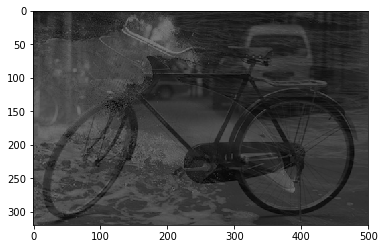

In [7]:
show_image(added_image//2)

Ofcourse no! Wait, are you confused? Then let's give you a small mathematical intuition.

In [8]:
a = np.array(200).astype('uint8')
b = np.array(100).astype('uint8')

c = a/2 + b/2
d = (a + b)/2

Is c = d? Or can you guess what the values of c and d will be?

In [9]:
print(c == d)

False


As expected, the values of c and d are not equal. Then what are the values of c and d?

In [10]:
print('Value of c is:', c)
print('Value of d is:', d)

Value of c is: 150.0
Value of d is: 22.0


Possible explanation? Well, since the numbers are unsigned int, a/2 = 100, b/2 = 50, so c = 150. But a + b = 44, as both are unsigned int, which can take max value of 255, after which it is reseted to 0, so d = 22

### Multiplication

How does images work with multiplication with a scalar value? We actually have seen that before when we took the average image. A division by 2 is nothin but a multiplication with 0.5. Now let's see what happens if we multiply the bicycle image with 1.5

In [11]:
def normalize_image(img):
    img = img.astype('float')
    max_value = np.max(img)
    
    return img/max_value

Orginal Image
(320, 500, 3)


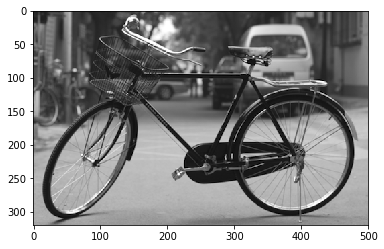

Image multiplied with 1.5
(320, 500, 3)


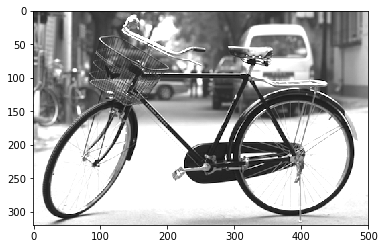

In [12]:
print('Orginal Image')
show_image(image1)
print('Image multiplied with 1.5')
show_image(np.clip((image1.astype('float') * 1.5), 0., 255.).astype('uint8'))

Does the new image looks brighter? Yes, it does as multiplying pixel values will bring it closer to 255, which is the brightest pixel. But did you notice we had to use np.clip() to keep all the pixel values between 0 and 255? Otherwise, when we change it back to unsigned int, the image will look distorted. So, a quick task, why don't you try removing np.clip() and see how the image is looking!

### Image Blending

Image blending was a popular trick for most photoshop specialists to bring interesting visual effects. It is nothing but a combination of some of the arithmatic image operators that we saw. So, let's try blending with two new images

(500, 500, 3)


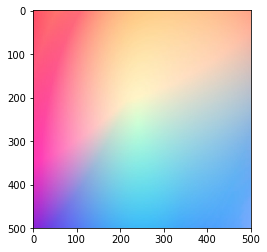

(500, 500, 3)


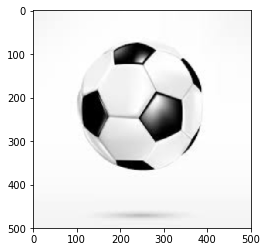

In [13]:
image3 = cv2.resize(cv2.imread('dataset/blend1.PNG'), (500,500))
image4 = cv2.resize(cv2.imread('dataset/football.png'), (500,500))
show_image(image3)
show_image(image4)

(500, 500, 3)


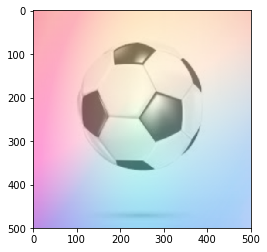

In [14]:
# Our own blending function
def blend_images(img1, img2, blending_ratio):
    return blending_ratio * img1 + (1. - blending_ratio) * img2

blended_img = blend_images(image3, image4, 0.5)
show_image(blended_img)

Oh wow! Now, we have a nice blended image of a football! Open CV also has a unction to perform the same type of blending. Let's see how it looks like.

(500, 500, 3)


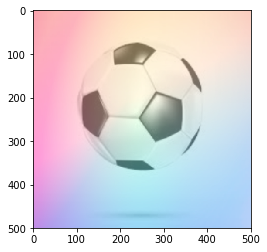

In [15]:
opencv_blended = cv2.addWeighted(image3,0.5,image4,0.5,0.5)
show_image(opencv_blended)

### Image Difference

Image difference can actually be thought as more than just mere image subtraction. But can be an important technique to localize difference in two images. So, let's try our hand at image differencing using the fruit images we saw before.

(258, 320, 3)


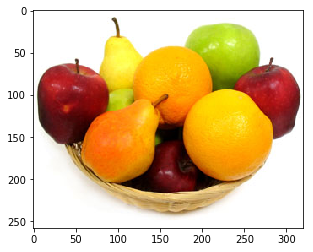

(258, 320, 3)


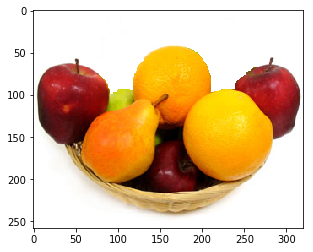

In [16]:
image5 = cv2.imread('dataset/fruit.png')
image6 = cv2.imread('dataset/fruit2.png')

show_image(image5)
show_image(image6)

Does the two images look same to you? Actually no! I thin someone has taken away few fruits! How do we know which one?

Displaying the highlighted missing objects
(258, 320, 3)


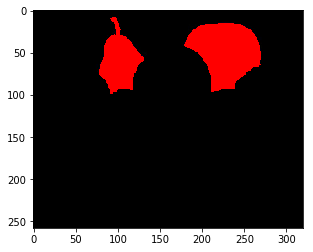

Localized the new images with missing objects
(258, 320, 3)


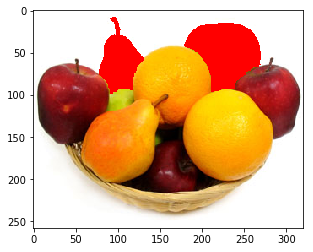

Original image for comparison
(258, 320, 3)


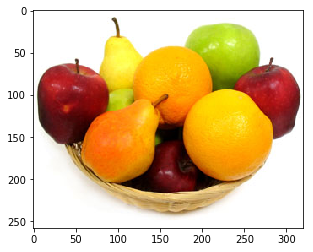

In [34]:
# Creating a copy of the images as we will be playing with the image pixel values
# and accidently we don't want any changes to the original images
new_img = image6.copy()
orig_img = image5.copy()

# find the difference image
difference_img = cv2.subtract(new_img, orig_img)
gray = cv2.cvtColor(difference_img, cv2.COLOR_BGR2GRAY)
difference_img[gray > 5] = [0, 0, 255]

# Displaying the highlighted missing objects
print('Displaying the highlighted missing objects')
show_image(difference_img)

# adding the coloured mask to the new image, to localize the missing objects
new_img[gray > 5] = [0, 0, 255]

print('Localized the new images with missing objects')
show_image(new_img)
print('Original image for comparison')
show_image(orig_img)

Ah, now we see, that someone might have taken our yellow pear and the green apple? Or did I have those fruits in breakfast?
Oh well, atleast our algorithm works well! Can you think of some other use cases where we can apply this technique?

### Bitwise operations

We saw how good our mask was to localize the missing objects. Now we will see other interesting opetions with bitwise operators

Bitwise not converts all black pixels to white and vice versa
(258, 320)


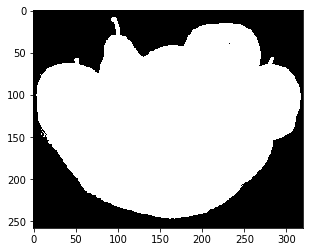

(258, 320)


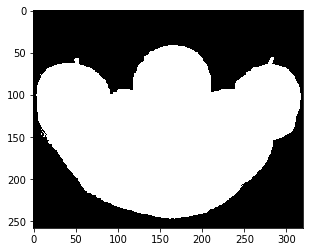

Bitwise and operations on the masks -- which takes the common pixels in both the images
(258, 320)


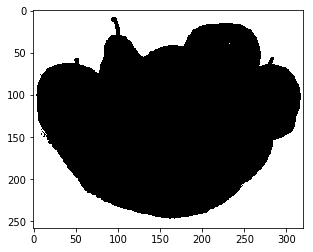

Bitwise and operations on the masks -- which takes unique pixels from both the images
(258, 320)


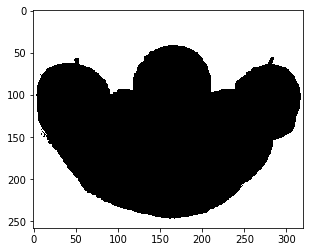

In [49]:
# Now create a mask of logo and create its inverse mask also
gray_orig = cv2.cvtColor(orig_img,cv2.COLOR_BGR2GRAY)
_, mask1 = cv2.threshold(gray_orig, 245, 255, cv2.THRESH_BINARY)

gray_new = cv2.cvtColor(image6,cv2.COLOR_BGR2GRAY)
_, mask2 = cv2.threshold(gray_new, 245, 255, cv2.THRESH_BINARY)

print('Bitwise not converts all black pixels to white and vice versa')
mask_inv1 = cv2.bitwise_not(mask1)
mask_inv2 = cv2.bitwise_not(mask2)
show_image(mask_inv1)
show_image(mask_inv2)


print('Bitwise and operations on the masks -- which takes the common pixels in both the images')
bit_and = cv2.bitwise_and(mask1, mask2)
show_image(bit_and)

print('Bitwise and operations on the masks -- which takes unique pixels from both the images')
bit_or = cv2.bitwise_or(mask1, mask2)
show_image(bit_or)

Now, let's see a function application of bitwise image operations

(288, 512)


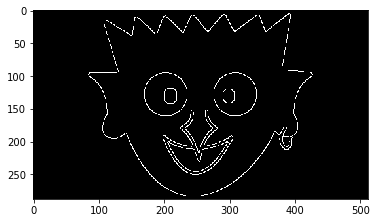

(288, 512)


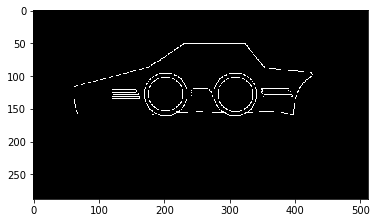

(288, 512)


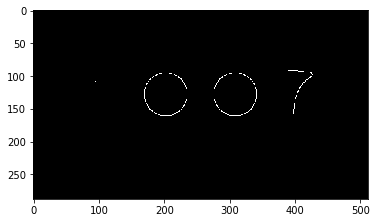

In [50]:
bit1 = cv2.imread('dataset/bit1.png', 0)
bit2 = cv2.imread('dataset/bit2.png', 0)

show_image(bit1)
show_image(bit2)

bit_and2 = cv2.bitwise_and(bit1, bit2)
show_image(bit_and2)

Ah! Hidden code words within images! Seems like a nice way to keep our pin codes or passwords hidden! And decode the same using bitwise operations!

### Image Statistics

Now let's create a common function which we can use every time to calculate simple image statitics, which can be helpful for us when we are doing image analysis

In [60]:
def image_stats(img):
    max = np.max(img)
    print('Max pixel value:', max)
    min = np.min(img)
    print('Min pixel value:', min)
    mean = np.mean(img)
    print('Mean pixel value:', mean)
    median = np.median(img)
    print('Median pixel value:', median)
    
    print('\nPixel Intensity Distribution:')
    plt.hist(img.ravel(),256,[0,256], color='r') 
    plt.show()    

Max pixel value: 255
Min pixel value: 0
Mean pixel value: 114.17345625
Median pixel value: 110.0

Pixel Intensity Distribution:


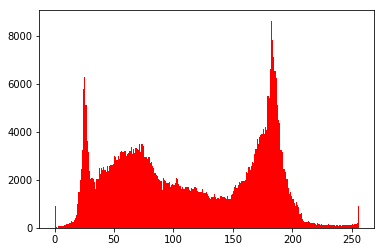

In [61]:
image_stats(image1)

Nice, our images stats function works well. Image statistics will be very handy when we work on real life problems, primary to understand the nature of the image based which we can fine tune some of the parameters.

### Image Normalization

Image Normalization is a process in which we change the range of pixel intensity values to make the image values more consistent and well defined within a range. It is often a handy feature we will use when we are building a feature vector for some of the machine learning work and it often helps to attenuate noise, give a uniform contrast and reduce the number of computations and make some of the algorithms run faster.

(320, 500, 3)


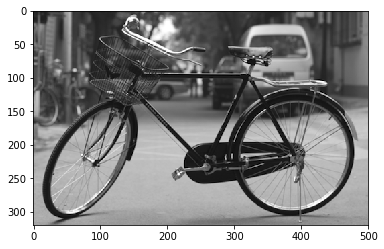

In [68]:
# We will use build it function from open cv to normalize images

final_img = cv2.normalize(image1,image1, 0, 255, cv2.NORM_MINMAX)
show_image(final_img)

Open CV also provides other approaches to normalize other than min max normalization, which are cv2.NORM_INF, cv2.NORM_L1 or cv2.NORM_L2. Try exploring all these and see what are the differences.

Thus, this brings us to the end of a bit long, yet quite an interesting section! In the next section we will be see some more broader applications of some of these operations that we had explored in this section.